# IA Paper 3 - Electronics - Examples paper 1

## Question 2

Three fixed point charges are placed on a two dimensional $(x, y)$ plane measured in millimetres, with a central origin at point $(0, 0)$. The value and position of each charge are as follows:  

- Charge A: 100nC at position $(0, 1)$  
- Charge B: -120nC at position $(1, 0)$  
- Charge D: 150nC at position $(-1, -1)$  
 
Sketch the plane showing each charge and calculate the magnitude and direction of the electric field $E$ at the position $(2, 2)$. Discuss with your supervisor what happens initially and at some time interval later if the charges were free to move?  

**(i)**. In Question 2 you have calculated the electric fields generated by the charges at position $(2, 2)$. We can use Python to calculate and display the fields at any point. The function `field_single_charge(q, r_q, r)` calculate the electrostatic field at point `r` generated by a charge `q` at point `r_q`. 

The following Python codes are used to define the charge A and its position in mm, and the point ($2, 2)$ in mm and calculate the electric field generated by the charge:
```python
q_a = 100e-9
r_a = np.array([0,1])*1e-3
r = np.array([2,2])*1e-3
e_a = field_single_charge(q_a, r_a, r)
```

The $x$ and $y$ components of the electric field $E$ are returned in the vector e_a, i.e. `e_a[0]` contains the $x$ component, `e_a[1]` the $y$ component. We can calculate the magnitude and direction of $E$ using:
```python
e_mag = np.linalg.norm(e_a)
e_dir = np.arctan2(e_a[1], e_a[0])*180/np.pi
```

Check that magnitude, direction, $x$ and $y$ components of your original answer correspond to your Python answer.

Re-use the commands above to calculate the fields generated by the other two charges `e_b` and `e_c`. Superimpose the three fields at point $(2, 2)$, i.e. 
```python
e_total = e_a + e_b + e_c
```

and compare magnitude, direction, $x$ and $y$ components of your final Python answer with the answer of your manual calculations.

**(ii)**. Write a Python program to calculate the superimposed electrostatic fields of the three charges on a grid of $(x,y)$ coordinates. The programme uses the command `np.meshgrid` to generate the coordinate mesh with $x$ and $y$ ranging from $−2$ to $+2$. The command `np.zeros` initialises two arrays to hold the $x$ and $y$ components of the sum of the three superimposed electrostatic fields. Two nested for loops step through all points on the $(x,y)$ grid and calculate the corresponding electrostatic field from above.

After having calculated the electrostatic field vector at each grid point we need to display it on a graph. The `matplotlib` command `plt.quiver(X,Y,U,V)` plots the components of a vector field $(U, V)$ on a grid $(X, Y)$. 

## Solution

In [1]:
%matplotlib inline

We first import the necessary modules:

In [2]:
# Imports relavant modules- Numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

Throughout this question we will use SI units. . Let's first create a variable for our vacuum permitivity, `e_0`.

In [3]:
# Defines the vaccuum permitivity
e_0 = 8.854e-12

We define a function to calculate the vector field at a point $r$ given the presence of a single charge $q$ at $r_q$. The function will take the charge, position of the charge and an input position at which we wish to find the field and outputs the vector that is the field at that point. Note that the direction of the field at any point $r$ is simply the difference between this point and $r_q$ as the field around this charge is radial.

In [4]:
def field_single_charge(q, r_q, r):
    # For field at position r generated by charge q at position r_q
    # This will return the vector of the field at the point r.

    # Calculates vector between r and r_q.
    r_ab = r - r_q

    # Calculates the length of the vector r_ab.
    l_ab = np.linalg.norm(r_ab)

    # Calculates the magnitude of the field generated by charge q (scalar).
    scalar_field_q = q/(4*np.pi*e_0*(l_ab**2))

    # Calculates the field generated by charge q (vector).
    vector_field_q = scalar_field_q*(r_ab/l_ab)

    return vector_field_q

We then define the position and size of charges A, B and C and the position $r$ (the position at which we wish to find the electric field due to the charges) as asked for in the question earlier.

In [5]:
# Values of the charges for A, B and C
q_a = 100e-9
q_b = -120e-9
q_c = 150e-9

# Arrays to hold the x and y components of the charge positions
r_a = np.array([0, 1])*1e-3
r_b = np.array([1, 0])*1e-3
r_c = np.array([-1, -1])*1e-3

# Array to hold the x and y cooridinates of r
r = np.array([2, 2])*1e-3

We can now calculate the field due to the charges A, B and C individually.

In [6]:
# Call the function created above to calculate the field from a given charge
e_a = field_single_charge(q_a, r_a, r)
e_b = field_single_charge(q_b, r_b, r)
e_c = field_single_charge(q_c, r_c, r)

We then calculate the superimposed field at point $r = (2, 2)$ by adding the vector components of the fields due to each charge individually. We can check the answer against our previous calculation by hand. 

In [7]:
# Calculate the net electric field
e_total = e_a + e_b + e_c

# Calculate magnitude and direction
e_mag = np.linalg.norm(e_total)
e_dir = np.arctan2(e_total[1], e_total[0])*180/np.pi

print("The field due to all three charges at {}m position: \n \
      {:.2e} V/m at angle {:.2f} degree.".format(r, e_mag, e_dir))

The field due to all three charges at [ 0.002  0.002]m position: 
       1.32e+08 V/m at angle -26.93 degree.


However, we can also use the function we've created to find the value of the field at many many more positions- enough to plot the field across the plane so we can see graphically how it changes around the charges. 

We'll use the NumPy function `meshgrid()` to create an array with values at a grid of points where we'll calulate and plot the field. We feed the function an array which has all the x values at which we wish to calculate the field, and also an array which contains all the y values. So if x and y have 5 entries each, the `meshgrid(x,y)` array would have $2 \times 25$ entries - a grid of 25, each with an x and y coordinate.

In [8]:
# Creates the x and y values to plot at.
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)

# X contains the len(x)*len(y) x values, Y contains the len(x)*len(y) y values
X, Y = np.meshgrid(x, y)

We can now start calculating the resulting electric field at every points on the grid. First, let's create array to store all the x- and y- components of the resulting electric field corresponding to grid points in `X` and `Y`. Here, `X.shape` returns the a numpy array indicating the dimension of `X`. 

In [9]:
# Total e_field and potential, set to zero initially
Ex = np.zeros(X.shape)
Ey = np.zeros(Y.shape)

For ease of calculation, we can create the array to store the calculated field at each point and its respective location. 

In [10]:
# Initialise vector to calculate the field and the position vector
field = np.zeros(2)
r_p = np.zeros(2)

We can now calculate the electric field at each point on the grid. Here we simply loop through all elements of `X` and calculate the electric field strength at row `i` and column `j`. The x- and y- components of the electric field at each point is stored in the 2D-array `Ex` and `Ey` - respectively. 

In [11]:
# Calcualte fields generated by each charge at each point
# on the grid and add them up
for i in range(0, X.shape[0]):
    for j in range(0, X.shape[1]):
        # Get the position vector on the mesh grid
        r_p[0], r_p[1] = X[i, j], Y[i, j]

        # Field and potential generated by charges A, B, C
        field = field_single_charge(q_a, r_a, 1e-3*r_p) + \
                field_single_charge(q_b, r_b, 1e-3*r_p) + \
                field_single_charge(q_c, r_c, 1e-3*r_p)

        # Store the result
        Ex[i, j] = field[0]
        Ey[i, j] = field[1]

Having obtained the vector of the electric field, we can easily calculate the magnitude `E_mag`. 

In [12]:
# Calculate the field strength
E_mag = np.sqrt(Ex**2 + Ey**2)

Using the `matplotlib` `quiver` function this is not difficult as the following code shows. Here we use the colour map for the vector based on its magnitude, `E_mag`. 

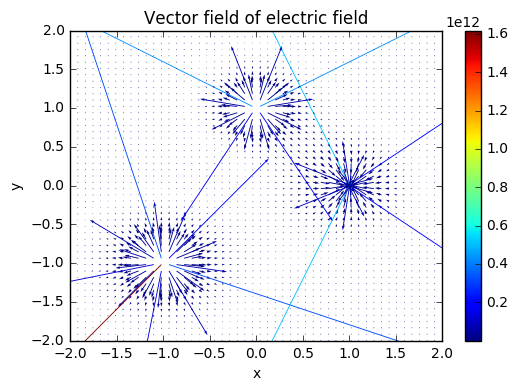

In [13]:
# Create quiver plot
qui = plt.quiver(X, Y, Ex, Ey, E_mag)

# Create a colour bar
plt.colorbar(qui)

# Label the plot
plt.title('Vector field of electric field')
plt.xlabel('x')
plt.ylabel('y');

The vector field has singularities at the point charges, where the length of the vectors to plot goes to infinity. One possible measure to avoid vectors of diverging length is to normalize the all vectors to unity as shown below. There is no need to show a colour bar here since all normalised vectors are of unit magnitude. 

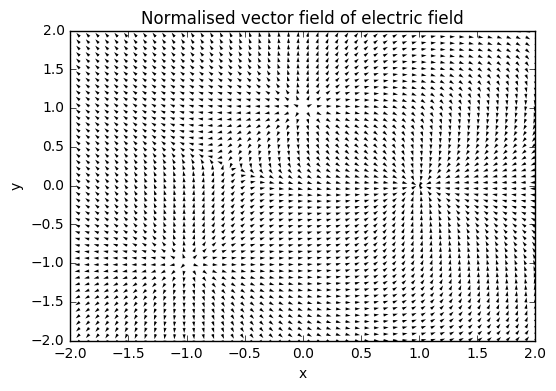

In [14]:
# Normalised the electric field
Ex_norm = Ex/E_mag
Ey_norm = Ey/E_mag

# Plot the normalised vector field
plt.quiver(X, Y, Ex_norm, Ey_norm)

# Label the plot
plt.title('Normalised vector field of electric field')
plt.xlabel('x')
plt.ylabel('y');

Normalizing the vector field to unity has the drawback of loosing information about the field strength. An alternative approach to get rid of extremely long vectors is to plot only those vectors whose lengths is below some given threshold `E_max`. This can be archived by replacing vectors which are too long by some invalid value, that is by the value `nan` - not a number.

To determine the value of `E_max`, we can look at the histogram of the magnitude of the electric field using `plt.hist`. The function `np.logspace(a,b,c)` simply returns `c` numbers spaced evenly between `a` and `b` on a log scale.

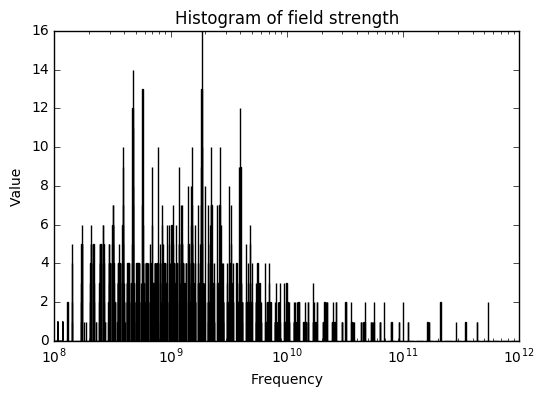

In [15]:
# Plot the histogram
plt.hist(E_mag, bins=np.logspace(8, 12, num=50))
plt.gca().set_xscale("log")

# Label the plot
plt.title('Histogram of field strength')
plt.xlabel('Frequency')
plt.ylabel('Value');

It can be seen from the histogram that we can decide the cut-off magnitude to be roughly $20 \times 10^9$. Students are encouraged to vary `E_max` to observe the results. We create variables `Ex_thres` and `Ey_thres` which are copies of `Ex` and `Ey` respectively but with `nan` replaced where the magnitude of the electric field exceeds `E_max`. The function call `E.flat` call a 2D array into a 1D array instead, and it is easier to work with indices for 1D array as we have fewer dimensions. Deep copy is required as we wish to alter the values in `Ex_thres` and `Ey_thres` while leaving `Ex` and `Ey` intact. 

In [16]:
# Create deep copy of the original electric field
Ex_thres = np.copy(Ex)
Ey_thres = np.copy(Ey)

# Find values larger that threshold
E_max = 20e9
k = np.where(E_mag.flat[:] > E_max)

# Replace them with nan
Ex_thres.flat[k] = np.nan
Ey_thres.flat[k] = np.nan

To draw where the point charges are, we can use `matplotlib` class `patches` to draw the circle around the location of the charge. 

In [17]:
from matplotlib.patches import Circle

# Specify colour for the charge
# Positive is red, and negative is blue
charge_colors = {True: 'r', False: 'b'}

Let's plot the new electric field. 

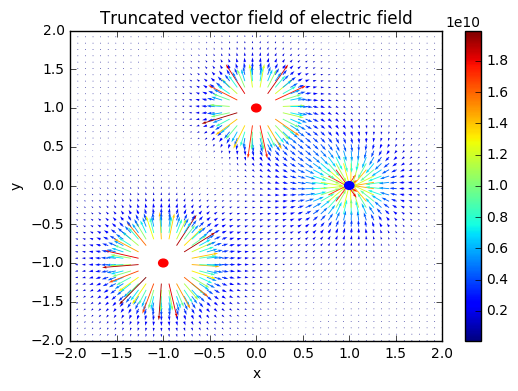

In [18]:
# Plot the truncated vector field
trun_qui = plt.quiver(X, Y, Ex_thres, Ey_thres, E_mag)

# Create a colour bar
plt.colorbar(trun_qui)

# Add filled circles for the charges themselves
plt.gca().add_artist(Circle(r_a*1e3, 0.05, color=charge_colors[q_a > 0]))
plt.gca().add_artist(Circle(r_b*1e3, 0.05, color=charge_colors[q_b > 0]))
plt.gca().add_artist(Circle(r_c*1e3, 0.05, color=charge_colors[q_c > 0]))

# Label the plot
plt.title('Truncated vector field of electric field')
plt.xlabel('x')
plt.ylabel('y');

The graph has become much nicer. Another option besides `plt.quiver` is a combination of `plt.contour` and `plt.streamplot`. Notice the colour bar here shows the log of the eletric field's strength instead. 

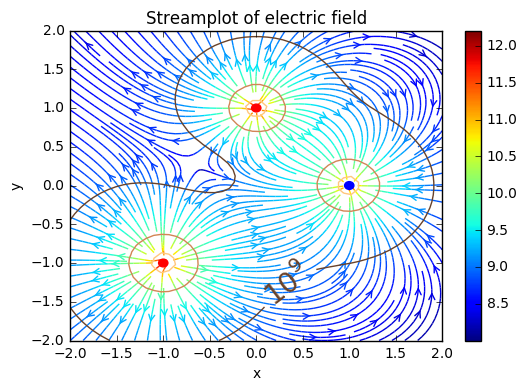

In [19]:
from matplotlib.colors import LogNorm
from matplotlib import ticker

# Set the axis
plt.axis([-2, 2, -2, 2])

# Plot the streamlines with an appropriate colormap and arrow style
# using logarithmic scale
stream = plt.streamplot(X, Y, Ex, Ey, color=np.log10(E_mag), linewidth=1, cmap='jet',
                        density=2.0, arrowstyle='->', arrowsize=1.5)

# Create a colour bar
plt.colorbar(stream.lines)

# Plot the contour
cont = plt.contour(X, Y, E_mag, levels=[1e8, 1e9, 1e10, 1e11],
                   cmap='copper', norm=LogNorm())
plt.clabel(cont, inline=1, fontsize=20., fmt=ticker.LogFormatterMathtext())

# Add filled circles for the charges themselves
plt.gca().add_artist(Circle(r_a*1e3, 0.05, color=charge_colors[q_a > 0]))
plt.gca().add_artist(Circle(r_b*1e3, 0.05, color=charge_colors[q_b > 0]))
plt.gca().add_artist(Circle(r_c*1e3, 0.05, color=charge_colors[q_c > 0]))

# Label the plot
plt.title('Streamplot of electric field')
plt.xlabel('x')
plt.ylabel('y');